<a href="https://colab.research.google.com/github/zhan0113/MachineLearning/blob/main/3_keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 從 TensorFlow 套件中匯入 keras 模組
# keras 是一個高階神經網路 API，用來快速建立與訓練深度學習模型
from tensorflow import keras

# 匯入「序列式模型」(Sequential)
# Sequential 表示模型的結構是由多層 (Layer) 依序堆疊而成
from keras.models import Sequential

# 匯入常用的層類別：
# Dense   → 全連接層（Fully Connected Layer），神經網路中最常見的一層
# Flatten → 將多維輸入展平成一維向量，用於連接卷積層與全連接層之間
from keras.layers import Dense, Flatten


In [ ]:
# 從 keras 中取得內建的 MNIST 手寫數字資料集
# MNIST 是一個常用於影像辨識練習的資料集，包含 0~9 的手寫數字圖片
mnist = keras.datasets.mnist

# 使用 load_data() 載入資料集，並分成「訓練集」與「測試集」
# train_data  → 訓練用的影像資料 (共 60,000 筆，每筆為 28x28 的灰階影像)
# train_label → 訓練用的標籤 (每筆影像對應的真實數字 0~9)
# test_data   → 測試用的影像資料 (共 10,000 筆)
# test_label  → 測試用的標籤
(train_data, train_label), (test_data, test_label) = mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# 顯示訓練資料 (影像) 的資料型態
print(type(train_data))   # 通常是 <class 'numpy.ndarray'>

# 顯示訓練資料的形狀
# (60000, 28, 28) → 表示共有 60,000 張影像，每張影像是 28x28 的灰階圖片
print(train_data.shape)

# 顯示訓練資料的標籤 (答案) 的資料型態
print(type(train_label))  # 通常是 <class 'numpy.ndarray'>

# 顯示訓練標籤的形狀
# (60000,) → 表示有 60,000 個標籤，對應上面每張圖片的真實數字 (0~9)
print(train_label.shape)

# 顯示測試資料 (影像) 的形狀
# (10000, 28, 28) → 表示共有 10,000 張影像，每張一樣是 28x28 的灰階圖片
print(test_data.shape)

# 顯示測試資料的標籤形狀
# (10000,) → 有 10,000 個測試標籤
print(test_label.shape)


<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
print(train_label[0])
print(train_data[0])

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

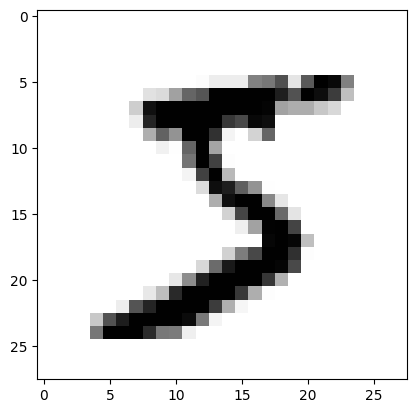

In [ ]:
import matplotlib.pyplot as plt  # 匯入繪圖模組 matplotlib.pyplot

# 顯示第一張訓練資料 (train_data[0])
# imshow() 是用來顯示影像的函式
# cmap='binary' 代表用黑白（灰階）方式顯示，而不是彩色
plt.imshow(train_data[0], cmap='binary')

# 顯示出圖形視窗
plt.show()


In [ ]:
# 建立一個序列式 (Sequential) 模型
# Sequential 模型表示各層 (layer) 會依照加入順序，從前到後連接起來
model = Sequential()

# 將輸入影像 (28x28) 攤平成一維向量
# 例如 28x28 = 784 個像素 → [784 維度的輸入]
model.add(Flatten())

# 第一個全連接層 (Dense layer)
# 有 32 個神經元 (units)
# activation='relu' 使用 ReLU 作為啟動函數（可增加非線性表現能力）
# input_dim=784 表示輸入的資料長度為 784（對應 28x28 影像）
model.add(Dense(32, activation='relu', input_dim=784))

# 輸出層 (Dense layer)
# 有 10 個神經元，對應到 10 個手寫數字 (0~9)
# activation='sigmoid' 表示輸出每一類的機率值（建議改用 softmax 效果更好）
model.add(Dense(10, activation='sigmoid'))

# 編譯模型 (設定訓練方式)
# optimizer='rmsprop' → 選用 RMSprop 優化器，自動調整學習率
# loss='sparse_categorical_crossentropy' → 適合用於整數標籤的多分類問題
# metrics=['accuracy'] → 顯示訓練過程中的準確率
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# 使用訓練資料 (train_data, train_label) 來訓練模型
# epochs=20     → 重複訓練整個資料集 20 次
# batch_size=512 → 每次更新權重時使用 512 筆資料作為一批 (Batch)
model.fit(train_data, train_label, epochs=20, batch_size=512)

# 使用測試資料評估模型的表現
# 會輸出 [loss值, accuracy值]
score = model.evaluate(test_data, test_label)

# 印出測試資料的「準確率 (accuracy)」
print(score[1])


Epoch 1/20
118/118 [==============================] - 8s 6ms/step - loss: 6.6168 - accuracy: 0.3339
Epoch 2/20
118/118 [==============================] - 1s 6ms/step - loss: 1.0995 - accuracy: 0.7135
Epoch 3/20
118/118 [==============================] - 1s 7ms/step - loss: 0.7904 - accuracy: 0.8069
Epoch 4/20
118/118 [==============================] - 1s 7ms/step - loss: 0.6363 - accuracy: 0.8471
Epoch 5/20
118/118 [==============================] - 1s 6ms/step - loss: 0.5263 - accuracy: 0.8725
Epoch 6/20
118/118 [==============================] - 1s 6ms/step - loss: 0.4557 - accuracy: 0.8856
Epoch 7/20
118/118 [==============================] - 1s 12ms/step - loss: 0.3942 - accuracy: 0.8975
Epoch 8/20
118/118 [==============================] - 1s 10ms/step - loss: 0.3528 - accuracy: 0.9053
Epoch 9/20
118/118 [==============================] - 1s 8ms/step - loss: 0.3148 - accuracy: 0.9122
Epoch 10/20
118/118 [==============================] - 1s 6ms/step - loss: 0.2978 - accuracy: 0.91